In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 설명

- 마블 영화들의 배급사, 배급일, 예산, 매출 관련 지표 포함

In [5]:
df = pd.read_csv('data/marvel_clean.csv', index_col='Title')
df[:5]

,Distributor,ReleaseDateUS,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
Title,,,,,,,
Howard the Duck,Universal Pictures,1986-08-01 00:00:00,37000000,5070136,16295774,21667000,37962774
Blade,New Line Cinema,1998-08-21 00:00:00,45000000,17073856,70087718,61095812,131183530
X-Men,20th Century Fox,2000-07-14 00:00:00,75000000,54471475,157299717,139039810,296339527
Blade II,New Line Cinema,2002-03-22 00:00:00,54000000,32528016,82348319,72661713,155010032
Spider-Man,Sony Pictures,2002-05-03 00:00:00,139000000,114844116,403706375,418002176,821708551


1. Title: 영화 제목
2. Distributor: 영화 배급업체
3. ReleaseDateUS: 미국에서의 영화 개봉 시기
4. Budget: 영화예산 (단위:백만달러)
5. OpeningWeekendNorthAmerica: 주말동안 미국에서 벌어들인 수익
6. NorthAmerica: 북미에서 벌어들인 총 수익
7. OtherTerritories: 다른 지역에서 벌어들인 총 수익
8. Worldwide: 전 세계에서 벌어들인 총 수익

In [6]:
df.columns

Index(['Distributor', 'ReleaseDateUS', 'Budget', 'OpeningWeekendNorthAmerica',
       'NorthAmerica', 'OtherTerritories', 'Worldwide'],
      dtype='object')

### 살펴보고 싶은 주제

1. 배급사별로 사용한 예산과 평균 세계 매출, 그리고 예산 대비 매출 칼럼을 만들어보자
2. 가장 높은 예산, 매출을 가진 두 배급사의 영화 종류, 전세계 매출액을 비교해보자

In [7]:
# 배급사 종류
df['Distributor'].unique()

array(['Universal Pictures', 'New Line Cinema', '20th Century Fox',
       'Sony Pictures', 'Lionsgate Films', 'Paramount Pictures',
       'Walt Disney Studios Motion Pictures', 'IMAX Entertainment',
       '20th Century Studios'], dtype=object)

In [8]:
# 배급사 종류 갯수
df['Distributor'].nunique()

9

In [9]:
# 필요없는 칼럼 제거(ReleaseDateUS): 미국에서 개봉된 시점은 분석에서 딱히 중요하지 않기 때문
df = df.drop('ReleaseDateUS', axis=1)
df[:5]

,Distributor,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
Title,,,,,,
Howard the Duck,Universal Pictures,37000000,5070136,16295774,21667000,37962774
Blade,New Line Cinema,45000000,17073856,70087718,61095812,131183530
X-Men,20th Century Fox,75000000,54471475,157299717,139039810,296339527
Blade II,New Line Cinema,54000000,32528016,82348319,72661713,155010032
Spider-Man,Sony Pictures,139000000,114844116,403706375,418002176,821708551


- 주제1,2를 살펴보기 위해선 배급사별 매출이 필요하므로, 배급사별로 그룹화.

In [ ]:
# 영화사별로 그룹화한 뒤 지표 계산 (단위:백만)
df_company = df.groupby('Distributor').mean()/1000000

In [11]:
df_company

,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
Distributor,,,,,
20th Century Fox,125.823529,68.514330,170.840730,245.062349,415.903425
20th Century Studios,67.000000,7.037017,23.855569,24.819497,48.675066
IMAX Entertainment,0.000000,1.500000,1.521787,1.330495,2.852282
Lionsgate Films,34.000000,9.052989,20.930583,11.469487,32.400070
New Line Cinema,54.666667,21.887714,68.282648,70.083662,138.366309
Paramount Pictures,157.500000,89.380752,247.132640,260.118346,507.250986
Sony Pictures,160.307692,96.202437,297.595613,466.011377,763.606990
Universal Pictures,108.000000,40.870869,94.426640,87.823628,182.250268
Walt Disney Studios Motion Pictures,200.300000,139.083504,374.640128,633.036067,1007.752502


In [ ]:
# 예산(Budget) 대비 매출(Worldwide) 칼럼 추가 -> 주제1) '예산 대비 매출 칼럼을 만들어보자'
df_company['Budget_Profit_ratio'] = (df_company['Worldwide']/df_company['Budget']) * 100 #퍼센트

In [13]:
df_company

,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide,Budget_Profit_ratio
Distributor,,,,,,
20th Century Fox,125.823529,68.514330,170.840730,245.062349,415.903425,330.545032
20th Century Studios,67.000000,7.037017,23.855569,24.819497,48.675066,72.649352
IMAX Entertainment,0.000000,1.500000,1.521787,1.330495,2.852282,inf
Lionsgate Films,34.000000,9.052989,20.930583,11.469487,32.400070,95.294325
New Line Cinema,54.666667,21.887714,68.282648,70.083662,138.366309,253.109102
Paramount Pictures,157.500000,89.380752,247.132640,260.118346,507.250986,322.064118
Sony Pictures,160.307692,96.202437,297.595613,466.011377,763.606990,476.338333
Universal Pictures,108.000000,40.870869,94.426640,87.823628,182.250268,168.750248
Walt Disney Studios Motion Pictures,200.300000,139.083504,374.640128,633.036067,1007.752502,503.121569


> 아래 시각화 코드 복습할 것!

- '배급사별'이므로 x축에는 'Distributor'가 들어가고, y축에는 비교하고자 하는 대상이 들어간다.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Universal Pictures'),
  Text(1, 0, 'New Line Cinema'),
  Text(2, 0, '20th Century Fox'),
  Text(3, 0, 'Sony Pictures'),
  Text(4, 0, 'Lionsgate Films'),
  Text(5, 0, 'Paramount Pictures'),
  Text(6, 0, 'Walt Disney Studios Motion Pictures'),
  Text(7, 0, 'IMAX Entertainment'),
  Text(8, 0, '20th Century Studios')])

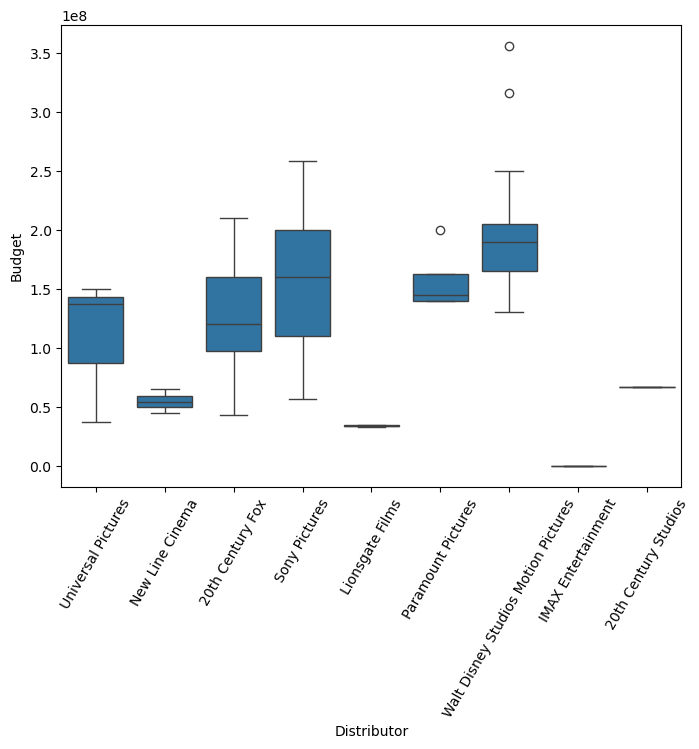

In [14]:
# 배급사별 예산(Budget)을 그래프로 비교해보자 (박스플롯 예시)
data = pd.concat([df['Budget'], df['Distributor']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='Distributor', y='Budget', data=data)
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Universal Pictures'),
  Text(1, 0, 'New Line Cinema'),
  Text(2, 0, '20th Century Fox'),
  Text(3, 0, 'Sony Pictures'),
  Text(4, 0, 'Lionsgate Films'),
  Text(5, 0, 'Paramount Pictures'),
  Text(6, 0, 'Walt Disney Studios Motion Pictures'),
  Text(7, 0, 'IMAX Entertainment'),
  Text(8, 0, '20th Century Studios')])

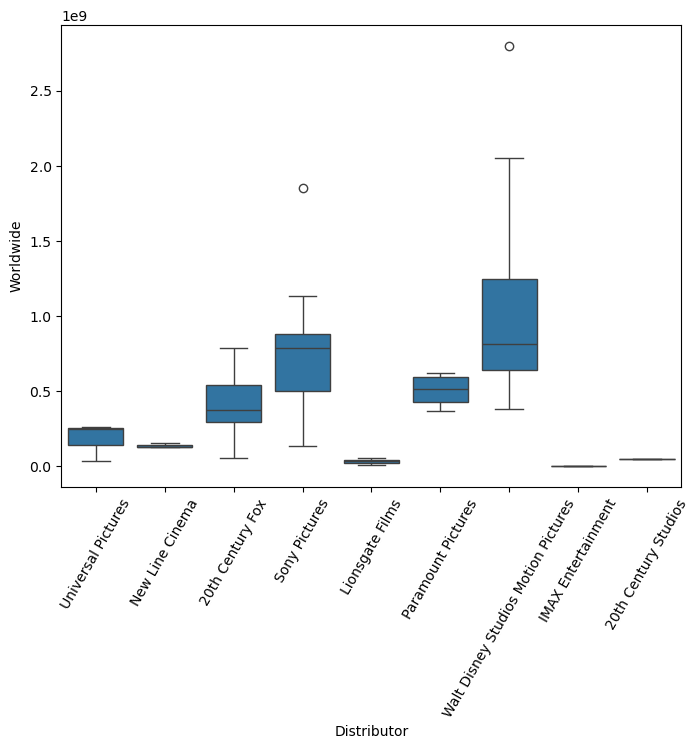

In [15]:
# 배급사별 전세계매출(Worldwide)을 그래프로 비교해보자 (박스플롯 예시)
data = pd.concat([df['Worldwide'], df['Distributor']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='Distributor', y='Worldwide', data=data)  
plt.xticks(rotation=60)

### Top 2 배급사 비교

- Sony Pictures와 Walt Disney Studios 비교

In [16]:
# 두 배급사 상영작 비교
sony = df[df['Distributor']=='Sony Pictures']
sony[:5]

,Distributor,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
Title,,,,,,
Spider-Man,Sony Pictures,139000000,114844116,403706375,418002176,821708551
Spider-Man 2,Sony Pictures,200000000,88156227,373585825,415390628,788976453
Ghost Rider,Sony Pictures,110000000,45388836,115802596,112935797,228738393
Spider-Man 3,Sony Pictures,258000000,151116516,336530303,554341323,890871626
Ghost Rider: Spirit of Vengeance,Sony Pictures,57000000,22115334,51774002,80789928,132563930


In [17]:
disney = df[df['Distributor']=='Walt Disney Studios Motion Pictures']
disney[:5]

,Distributor,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
Title,,,,,,
The Avengers,Walt Disney Studios Motion Pictures,220000000,207438708,623357910,895455078,1518812988
Iron Man 3,Walt Disney Studios Motion Pictures,200000000,174144585,409013994,805797258,1214811252
Thor: The Dark World,Walt Disney Studios Motion Pictures,170000000,85737841,206362140,438209262,644571402
Captain America: The Winter Soldier,Walt Disney Studios Motion Pictures,170000000,95023721,259766572,454497695,714264267
Guardians of the Galaxy,Walt Disney Studios Motion Pictures,170000000,94320883,333176600,440152029,773328629


In [18]:
# 가장 높은 매출 기록 영화 비교
sony.sort_values(by='Worldwide', ascending=False)[:5]

,Distributor,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
Title,,,,,,
Spider-Man: No Way Home,Sony Pictures,200000000,260138569,780418859,1072000000,1852418859
Spider-Man: Far From Home,Sony Pictures,160000000,92579212,390532085,741395911,1131927996
Spider-Man 3,Sony Pictures,258000000,151116516,336530303,554341323,890871626
Spider-Man: Homecoming,Sony Pictures,175000000,117027503,334201140,545965784,880166924
Venom,Sony Pictures,100000000,80255756,213515506,641498448,855013954


In [19]:
disney.sort_values(by='Worldwide', ascending=False)[:5]

,Distributor,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
Title,,,,,,
Avengers: Endgame,Walt Disney Studios Motion Pictures,356000000,357115007,858373000,1937901401,2797800564
Avengers: Infinity War,Walt Disney Studios Motion Pictures,316000000,257698183,678815482,1369544272,2048359754
The Avengers,Walt Disney Studios Motion Pictures,220000000,207438708,623357910,895455078,1518812988
Avengers: Age of Ultron,Walt Disney Studios Motion Pictures,250000000,191271109,459005868,946397826,1405403694
Black Panther,Walt Disney Studios Motion Pictures,200000000,202003951,700059566,646853595,1346913161


두 배급사의 매출 비교 그래프를 그려보자(바이올린 플롯 예시)

In [20]:
# sony와 disney 데이터 병합
s_vs_d = pd.concat([sony, disney])
s_vs_d.head()

,Distributor,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
Title,,,,,,
Spider-Man,Sony Pictures,139000000,114844116,403706375,418002176,821708551
Spider-Man 2,Sony Pictures,200000000,88156227,373585825,415390628,788976453
Ghost Rider,Sony Pictures,110000000,45388836,115802596,112935797,228738393
Spider-Man 3,Sony Pictures,258000000,151116516,336530303,554341323,890871626
Ghost Rider: Spirit of Vengeance,Sony Pictures,57000000,22115334,51774002,80789928,132563930


<Axes: xlabel='Distributor', ylabel='Worldwide'>

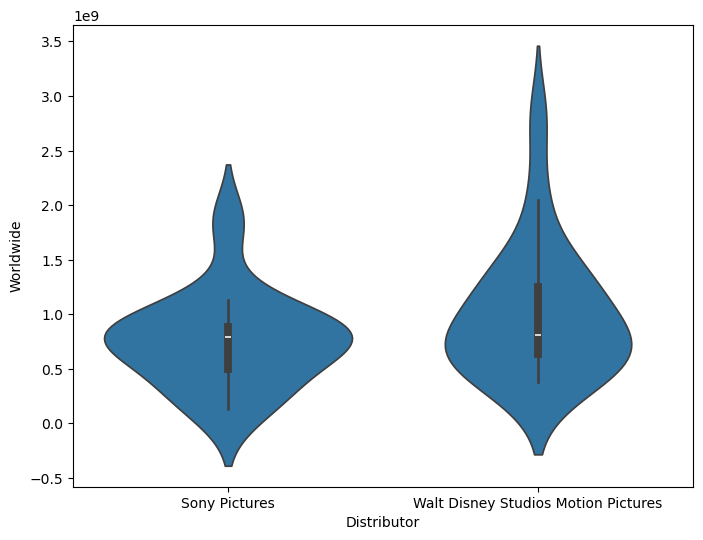

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x='Distributor', y='Worldwide', data=s_vs_d)